In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statistics as stats

In [4]:
#Import training and test set
url='https://raw.githubusercontent.com/vivianndo/NLP-of-Disaster-Tweets/main/tweets_train_filled.csv'
url_test='https://raw.githubusercontent.com/vivianndo/NLP-of-Disaster-Tweets/main/tweets_test.csv'
url_train='https://raw.githubusercontent.com/vivianndo/NLP-of-Disaster-Tweets/main/tweets_train.csv'
train=pd.read_csv(url_train)
test=pd.read_csv(url_test)

In [5]:
#Show dimensions 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7613
Number of columns: 5
Number of rows: 3263
Number of columns: 4


In [6]:
#Display fields in training set
train.columns.values.tolist()

['id', 'keyword', 'location', 'text', 'target']

In [7]:
#Display fields in test set
test.columns.values.tolist()

#'target' field is only in training set. This is what we are predicting for test set

['id', 'keyword', 'location', 'text']

In [8]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [9]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [10]:
#There are 110 duplicated tweets in training set and 20 in the test set. 
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

110
20


In [11]:
#Drop duplicated tweets and confirm that they are dropped. 
#By default, the drop_duplicates() function deletes all duplicates except the first entry (keep=first)
#Inplace=True changes source dataframe 
train.drop_duplicates(subset ='text',
                     inplace=True)
test.drop_duplicates(subset ='text',
                     inplace=True)
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

0
0


In [12]:
#Dimensions after duplicated tweets are deleted. These numbers now match the number of unique tweets. 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7503
Number of columns: 5
Number of rows: 3243
Number of columns: 4


In [13]:
#Show all null values in training set
train.isnull().sum()

id             0
keyword       56
location    2482
text           0
target         0
dtype: int64

In [14]:
#Show all null values in test set
test.isnull().sum()

id             0
keyword       26
location    1097
text           0
dtype: int64

There is a significant number of null values for location for both sets (about 33%). Keyword has been manually filled in for training set ONLY

In [15]:
#Show number of unique entries for each field
print(train['location'].nunique())
print(train['keyword'].nunique())
print(train['text'].nunique())
print(train['id'].nunique())

print(test['location'].nunique())
print(test['keyword'].nunique())
print(test['text'].nunique())
print(test['id'].nunique())

3327
221
7503
7503
1599
221
3243
3243


In [16]:
#Add 'character_count' column to display the number of characters used in each tweet
train['character_count']=train['text'].str.len()
train.head()

,id,keyword,location,text,target,character_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


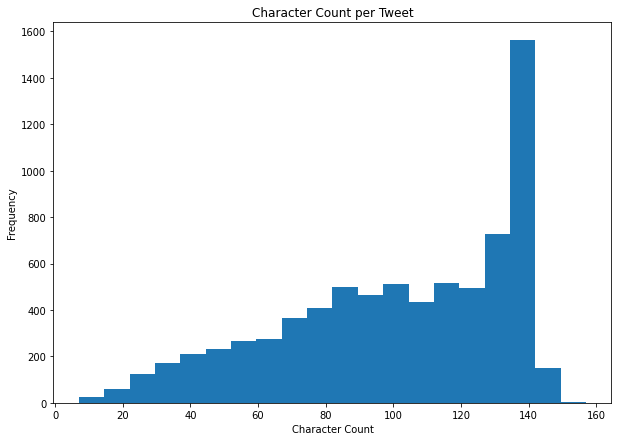

In [17]:
#Frequency of character_counts per tweet
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(train['character_count'],bins=20)
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.title("Character Count per Tweet")

# Show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Character Count per Target')

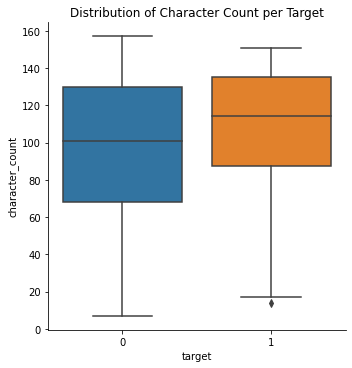

In [18]:
#Boxplot of distribution of character count for each target
sns.catplot(data=train, x="target", y="character_count", kind="box")
plt.title("Distribution of Character Count per Target")

In [19]:
#Show mean/median character_count for each value of target
character_count_per_target=train.groupby('target').agg({'character_count':['mean','median']})
print(character_count_per_target)

       character_count       
                  mean median
target                       
0            95.605110  101.0
1           107.982176  114.0


In [20]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der